In [1]:
from sklearn.datasets import make_classification
from sklearn import preprocessing
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
import copy

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
data = pd.read_csv('data/GTPD_bike_data.csv')
drop_cols = [x for x in data.columns.values if x.startswith('Unnamed')]
bad_cols = [
    'LocationDirectional',
    'CaseDisposition',
    'LocationLatitude',
    'LocationLongitude',
    'LocationStreet'
]
drop_cols += bad_cols
data.drop(drop_cols, axis=1, inplace=True)
data = data.fillna('...')
data.head()

,IncidentFromDate,IncidentFromTime,IncidentToDate,IncidentToTime,CaseStatus,LocationCode,PatrolZone,LocationLandmark,LocationStreetNumber
0,01/13/2013,18:00:00,01/14/2013,13:00:00,Inactive,NONCAM,Z2,Theta XI Fraternity 329A Z2,777
1,02/06/2013,23:00:00,02/07/2013,12:00:00,Inactive,ONCAM,Z2,Delta Chi Fraternity,170
2,02/14/2013,11:00:00,02/21/2013,09:30:00,Inactive,ONCAM,Z2,Harrison Residence Hall 14 Z2,660
3,02/26/2013,21:00:00,02/27/2013,08:30:00,Inactive,ONCAM,Z4,Hefner Residence Hall,510
4,02/27/2013,22:00:00,03/04/2013,08:00:00,Inactive,ONCAM,Z2,Towers Residence Hall,112


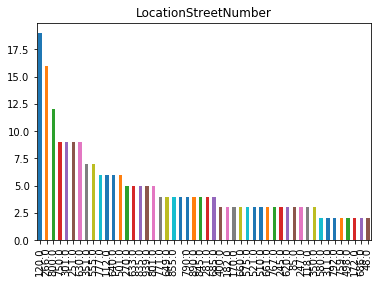

In [5]:
pd.value_counts(data['LocationStreetNumber'])[:50].plot.bar()
plt.title('LocationStreetNumber')
plt.show()

In [181]:
'''
TODO:

**msg me if you have questions**

1. convert incidentfromdates to months - disregard year - one-hot encode
2. convert incidenttodate to months - disregard year - one-hot-encode
3. tokenize incidentfromtime && incidenttotime- one-hot encode
4. one-hot encode casestatus
5. one-hot encode locationcode
6. clean out locationlandmark
    - remove all: numbers, (SST), symbols, etc
    - one-hot encode
7. one-hot encode locationstreetnumber
8. one-hot encode locationstreet
'''

'\nTODO:\n\n**msg me if you have questions**\n\n1. convert incidentfromdates to months - disregard year - one-hot encode\n2. convert incidenttodate to months - disregard year - one-hot-encode\n3. tokenize incidentfromtime && incidenttotime- one-hot encode\n4. one-hot encode casestatus\n5. one-hot encode locationcode\n6. clean out locationlandmark\n    - remove all: numbers, (SST), symbols, etc\n    - one-hot encode\n7. one-hot encode locationstreetnumber\n8. one-hot encode locationstreet\n'

In [6]:
# Clean from and to date data
def return_month(data):
    data = data.split('/')[0]
    if data[0] == '0':
        data = data[1:]
    return data

data['IncidentFromDate'] = data.apply(lambda row: return_month(row['IncidentFromDate']), axis=1)
data['IncidentToDate'] = data.apply(lambda row: return_month(row['IncidentToDate']), axis=1)

In [7]:
# Clean to and from time
def return_hour(data):
    data = data.split(':')[0]
    if data[0] == '0':
        data = data[1:]
    return data

data['IncidentFromTime'] = data.apply(lambda row: return_hour(row['IncidentFromTime']), axis=1)
data['IncidentToTime'] = data.apply(lambda row: return_hour(row['IncidentToTime']), axis=1)

In [8]:
# Clean location landmark data, along with case status and location street
data['LocationLandmark'] = data['LocationLandmark'].str.replace(r"\(.*\)","")
data['LocationLandmark'] = data['LocationLandmark'].str.replace(r"\d+", "")
data['LocationLandmark'] = data['LocationLandmark'].str.replace(' Z', '')
data['LocationLandmark'] = data['LocationLandmark'].str.upper()
data['CaseStatus'] = data['CaseStatus'].str.upper()
data['LocationStreetNumber'] = data['LocationStreetNumber'].astype(str)
data.head()

,IncidentFromDate,IncidentFromTime,IncidentToDate,IncidentToTime,CaseStatus,LocationCode,PatrolZone,LocationLandmark,LocationStreetNumber
0,1,18,1,13,INACTIVE,NONCAM,Z2,THETA XI FRATERNITY A,777.0
1,2,23,2,12,INACTIVE,ONCAM,Z2,DELTA CHI FRATERNITY,170.0
2,2,11,2,9,INACTIVE,ONCAM,Z2,HARRISON RESIDENCE HALL,660.0
3,2,21,2,8,INACTIVE,ONCAM,Z4,HEFNER RESIDENCE HALL,510.0
4,2,22,3,8,INACTIVE,ONCAM,Z2,TOWERS RESIDENCE HALL,112.0


In [9]:
'''
TODO:
1. Generate negative samples 10:1
2. One_hot_enconde with pd.get_dummies(data)
3. Generate synthetic data - 2k examples?
4. Train classifier
'''

'\nTODO:\n1. Generate negative samples 10:1\n2. One_hot_enconde with pd.get_dummies(data)\n3. Generate synthetic data - 2k examples?\n4. Train classifier\n'

In [10]:
data['class'] = [1] * len(data)
print ("Attempting to create " + str(len(data) * 10) + " rows of data")
df = create_neg_data(data, data.columns.values, len(data)*10)
df.head()

Attempting to create 2920 rows of data
Added 2920 rows of negative data.


,IncidentFromDate,IncidentFromTime,IncidentToDate,IncidentToTime,CaseStatus,LocationCode,PatrolZone,LocationLandmark,LocationStreetNumber,class
0,1,18,1,13,INACTIVE,NONCAM,Z2,THETA XI FRATERNITY A,777.0,1
1,2,23,2,12,INACTIVE,ONCAM,Z2,DELTA CHI FRATERNITY,170.0,1
2,2,11,2,9,INACTIVE,ONCAM,Z2,HARRISON RESIDENCE HALL,660.0,1
3,2,21,2,8,INACTIVE,ONCAM,Z4,HEFNER RESIDENCE HALL,510.0,1
4,2,22,3,8,INACTIVE,ONCAM,Z2,TOWERS RESIDENCE HALL,112.0,1


In [11]:
df.tail()

,IncidentFromDate,IncidentFromTime,IncidentToDate,IncidentToTime,CaseStatus,LocationCode,PatrolZone,LocationLandmark,LocationStreetNumber,class
3207,1,20,8,17,FURTHER INVESTIGATION,ONCAM,OFFCAM,INSTITUTE OF PAPER SCIENCE,172.0,0
3208,11,12,8,14,FURTHER INVESTIGATION,NONCLERY,OFFCAM,CAMPUS RECREATION CENTER,115.0,0
3209,7,9,9,,INACTIVE,NONCLERY,OFFCAM,"TECHWOOD DRIVE, NW",813.0,0
3210,5,2,5,9,FURTHER INVESTIGATION,PUB,...,WEBER BUILDING,750.0,0
3211,3,17,2,21,CLOSED/CLEARED,PUB,Z3,LAMBDA CHI ALPHA FRATERNITY,500.0,0


In [12]:
one_hot_data = pd.get_dummies(df)
one_hot_data.head(20)

,IncidentFromDate_1,IncidentFromDate_10,IncidentFromDate_11,IncidentFromDate_12,IncidentFromDate_2,IncidentFromDate_3,IncidentFromDate_4,IncidentFromDate_5,IncidentFromDate_6,IncidentFromDate_7,IncidentFromDate_8,IncidentFromDate_9,IncidentFromTime_,IncidentFromTime_0,IncidentFromTime_1,IncidentFromTime_10,IncidentFromTime_11,IncidentFromTime_12,IncidentFromTime_13,IncidentFromTime_14,IncidentFromTime_15,IncidentFromTime_16,IncidentFromTime_17,IncidentFromTime_18,IncidentFromTime_19,IncidentFromTime_2,IncidentFromTime_20,IncidentFromTime_21,IncidentFromTime_22,IncidentFromTime_23,IncidentFromTime_3,IncidentFromTime_4,IncidentFromTime_5,IncidentFromTime_6,IncidentFromTime_7,IncidentFromTime_8,IncidentFromTime_9,IncidentToDate_...,IncidentToDate_1,IncidentToDate_10,IncidentToDate_11,IncidentToDate_12,IncidentToDate_2,IncidentToDate_3,IncidentToDate_4,IncidentToDate_5,IncidentToDate_6,IncidentToDate_7,IncidentToDate_8,IncidentToDate_9,IncidentToTime_,IncidentToTime_...,IncidentToTime_0,IncidentToTime_1,IncidentToTime_10,IncidentToTime_11,IncidentToTime_12,IncidentToTime_13,IncidentToTime_14,IncidentToTime_15,IncidentToTime_16,IncidentToTime_17,IncidentToTime_18,IncidentToTime_19,IncidentToTime_2,IncidentToTime_20,IncidentToTime_21,IncidentToTime_22,IncidentToTime_23,IncidentToTime_3,IncidentToTime_4,IncidentToTime_5,IncidentToTime_6,IncidentToTime_7,IncidentToTime_8,IncidentToTime_9,CaseStatus_CLOSED/CLEARED,CaseStatus_FURTHER INVESTIGATION,CaseStatus_INACTIVE,LocationCode_NONCAM,LocationCode_NONCLERY,LocationCode_ONCAM,LocationCode_ONCAMRES,LocationCode_PUB,PatrolZone_...,PatrolZone_OFFCAM,PatrolZone_Z1,PatrolZone_Z2,PatrolZone_Z3,PatrolZone_Z4,"LocationLandmark_ TECHWOOD DRIVE, NW",LocationLandmark_...,LocationLandmark_ALPHA EPSILON PI FRATERNITY,LocationLandmark_ALUMNI-FACULTY HOUSE,LocationLandmark_ARCHITECTURE CARD LOT,LocationLandmark_ARMSTRONG RESIDENCE HALL,LocationLandmark_BARNES AND NOBLE BOOKSTORE,LocationLandmark_BARREL HOUSE,LocationLandmark_BETA THETA PI FRATERNITY,LocationLandmark_BETWEEN LOVE BUILDING & INSTRUCTIONAL CENTER,LocationLandmark_BOGGS BUILDING,LocationLandmark_BRITTAIN DINING HALL,LocationLandmark_BRITTAIN DINING HALL,LocationLandmark_BRITTAN DINNING HALL,LocationLandmark_BROWN RESIDENCE HALL,LocationLandmark_BURGER BOWL FIELD,LocationLandmark_CALDWELL RESIDENCE HALL,LocationLandmark_CALDWELL RESIDENCE HALL,LocationLandmark_CAMPUS CHRISTIAN FELLOWSHIP,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER PARKING DECK,LocationLandmark_CARBON-NEUTRAL ENERGY SOLUTIONS LAB,LocationLandmark_CATHOLIC CENTER,LocationLandmark_CENTENNIAL RESEARCH BUILDING,LocationLandmark_CENTER FOR ADVANCED BRAIN IMAGING,LocationLandmark_CENTER STREET APARTMENT,LocationLandmark_CENTER STREET APARTMENTS,LocationLandmark_CENTER STREET APARTMENTS,LocationLandmark_CHERRY EMERSON,LocationLandmark_CHERRY EMERSON BUILDING,LocationLandmark_CHRISTIAN CAMPUS FELLOWSHIP,LocationLandmark_CHRISTIAN CAMPUS FELLOWSHIP NORTH,LocationLandmark_CLOUDMAN RESIDENCE HALL,LocationLandmark_CLOUDMAN RESIDENCE HALL,LocationLandmark_CLOUGH BUILDING,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING CENTER,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING CENTER,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING COMMONS,LocationLandmark_COLLEGE OF ARCHITECTURE EAST,LocationLandmark_COLLEGE OF ARCHITECTURE EAST,LocationLandmark_COLLEGE OF ARCHITECTURE- EAST WING,LocationLandmark_COLLEGE OF ARCHITECTURE-WEST WING,LocationLandmark_COLLEGE OF ARCHITECTURE-WEST WING,LocationLandmark_COLLEGE OF COMPUTING,LocationLandmark_COLLEGE OF COMPUTING BUILDING,LocationLandmark_CRECINE RESIDENCE HAL,LocationLandmark_D.M. SMITH BUILDING,LocationLandmark_DELTA CHI,LocationLandmark_DELTA CHI FRATERNITY,LocationLandmark_DELTA TAU DELTA FRATERNITY,LocationLandmark_EDGE ATHLETIC CENTER,LocationLandmark_EIGHTH STREET APARTMENTS,LocationLandmark_EIGHTH STREET APARTMENTS,Locatio

In [13]:
df = synthetic(one_hot_data, 1000)
%time

Added 1000 rows of synthetic data.
Wall time: 0 ns


# Train a Classifier

In [14]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head(100)

,IncidentFromDate_1,IncidentFromDate_10,IncidentFromDate_11,IncidentFromDate_12,IncidentFromDate_2,IncidentFromDate_3,IncidentFromDate_4,IncidentFromDate_5,IncidentFromDate_6,IncidentFromDate_7,IncidentFromDate_8,IncidentFromDate_9,IncidentFromTime_,IncidentFromTime_0,IncidentFromTime_1,IncidentFromTime_10,IncidentFromTime_11,IncidentFromTime_12,IncidentFromTime_13,IncidentFromTime_14,IncidentFromTime_15,IncidentFromTime_16,IncidentFromTime_17,IncidentFromTime_18,IncidentFromTime_19,IncidentFromTime_2,IncidentFromTime_20,IncidentFromTime_21,IncidentFromTime_22,IncidentFromTime_23,IncidentFromTime_3,IncidentFromTime_4,IncidentFromTime_5,IncidentFromTime_6,IncidentFromTime_7,IncidentFromTime_8,IncidentFromTime_9,IncidentToDate_...,IncidentToDate_1,IncidentToDate_10,IncidentToDate_11,IncidentToDate_12,IncidentToDate_2,IncidentToDate_3,IncidentToDate_4,IncidentToDate_5,IncidentToDate_6,IncidentToDate_7,IncidentToDate_8,IncidentToDate_9,IncidentToTime_,IncidentToTime_...,IncidentToTime_0,IncidentToTime_1,IncidentToTime_10,IncidentToTime_11,IncidentToTime_12,IncidentToTime_13,IncidentToTime_14,IncidentToTime_15,IncidentToTime_16,IncidentToTime_17,IncidentToTime_18,IncidentToTime_19,IncidentToTime_2,IncidentToTime_20,IncidentToTime_21,IncidentToTime_22,IncidentToTime_23,IncidentToTime_3,IncidentToTime_4,IncidentToTime_5,IncidentToTime_6,IncidentToTime_7,IncidentToTime_8,IncidentToTime_9,CaseStatus_CLOSED/CLEARED,CaseStatus_FURTHER INVESTIGATION,CaseStatus_INACTIVE,LocationCode_NONCAM,LocationCode_NONCLERY,LocationCode_ONCAM,LocationCode_ONCAMRES,LocationCode_PUB,PatrolZone_...,PatrolZone_OFFCAM,PatrolZone_Z1,PatrolZone_Z2,PatrolZone_Z3,PatrolZone_Z4,"LocationLandmark_ TECHWOOD DRIVE, NW",LocationLandmark_...,LocationLandmark_ALPHA EPSILON PI FRATERNITY,LocationLandmark_ALUMNI-FACULTY HOUSE,LocationLandmark_ARCHITECTURE CARD LOT,LocationLandmark_ARMSTRONG RESIDENCE HALL,LocationLandmark_BARNES AND NOBLE BOOKSTORE,LocationLandmark_BARREL HOUSE,LocationLandmark_BETA THETA PI FRATERNITY,LocationLandmark_BETWEEN LOVE BUILDING & INSTRUCTIONAL CENTER,LocationLandmark_BOGGS BUILDING,LocationLandmark_BRITTAIN DINING HALL,LocationLandmark_BRITTAIN DINING HALL,LocationLandmark_BRITTAN DINNING HALL,LocationLandmark_BROWN RESIDENCE HALL,LocationLandmark_BURGER BOWL FIELD,LocationLandmark_CALDWELL RESIDENCE HALL,LocationLandmark_CALDWELL RESIDENCE HALL,LocationLandmark_CAMPUS CHRISTIAN FELLOWSHIP,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER PARKING DECK,LocationLandmark_CARBON-NEUTRAL ENERGY SOLUTIONS LAB,LocationLandmark_CATHOLIC CENTER,LocationLandmark_CENTENNIAL RESEARCH BUILDING,LocationLandmark_CENTER FOR ADVANCED BRAIN IMAGING,LocationLandmark_CENTER STREET APARTMENT,LocationLandmark_CENTER STREET APARTMENTS,LocationLandmark_CENTER STREET APARTMENTS,LocationLandmark_CHERRY EMERSON,LocationLandmark_CHERRY EMERSON BUILDING,LocationLandmark_CHRISTIAN CAMPUS FELLOWSHIP,LocationLandmark_CHRISTIAN CAMPUS FELLOWSHIP NORTH,LocationLandmark_CLOUDMAN RESIDENCE HALL,LocationLandmark_CLOUDMAN RESIDENCE HALL,LocationLandmark_CLOUGH BUILDING,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING CENTER,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING CENTER,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING COMMONS,LocationLandmark_COLLEGE OF ARCHITECTURE EAST,LocationLandmark_COLLEGE OF ARCHITECTURE EAST,LocationLandmark_COLLEGE OF ARCHITECTURE- EAST WING,LocationLandmark_COLLEGE OF ARCHITECTURE-WEST WING,LocationLandmark_COLLEGE OF ARCHITECTURE-WEST WING,LocationLandmark_COLLEGE OF COMPUTING,LocationLandmark_COLLEGE OF COMPUTING BUILDING,LocationLandmark_CRECINE RESIDENCE HAL,LocationLandmark_D.M. SMITH BUILDING,LocationLandmark_DELTA CHI,LocationLandmark_DELTA CHI FRATERNITY,LocationLandmark_DELTA TAU DELTA FRATERNITY,LocationLandmark_EDGE ATHLETIC CENTER,LocationLandmark_EIGHTH STREET APARTMENTS,LocationLandmark_EIGHTH STREET APARTMENTS,Locatio

In [27]:
div = int(0.8 * len(df))
trainX = df[:div]
testX = df[div:]

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

c:\users\kevin\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
model = Sequential()
model.add(Dense(60, input_dim=346, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
labels = trainX['class_1'].astype(int).tolist()
model.fit(trainX.drop(['class_0', 'class_1'], axis=1), labels, epochs=15)

Epoch 1/15
3369/3369 [==============================] - 4s 1ms/step - loss: 0.5386 - acc: 0.8175
Epoch 2/15
3369/3369 [==============================] - 0s 128us/step - loss: 0.3190 - acc: 0.8652
Epoch 3/15
3369/3369 [==============================] - 0s 132us/step - loss: 0.2562 - acc: 0.8822
Epoch 4/15
3369/3369 [==============================] - 0s 136us/step - loss: 0.2219 - acc: 0.9095
Epoch 5/15
3369/3369 [==============================] - 0s 137us/step - loss: 0.1991 - acc: 0.9243 0s - loss: 0.2039 - acc: 0.
Epoch 6/15
3369/3369 [==============================] - 0s 137us/step - loss: 0.1758 - acc: 0.9332
Epoch 7/15
3369/3369 [==============================] - 0s 136us/step - loss: 0.1579 - acc: 0.9457
Epoch 8/15
3369/3369 [==============================] - 0s 137us/step - loss: 0.1393 - acc: 0.9489
Epoch 9/15
3369/3369 [==============================] - 0s 137us/step - loss: 0.1243 - acc: 0.9605
Epoch 10/15
3369/3369 [==============================] - 0s 126us/step - loss: 0.11

In [28]:
labels = testX['class_1'].astype(int).tolist()
model.evaluate(testX.drop(['class_0', 'class_1'], axis=1), labels)

843/843 [==============================] - 0s 76us/step


[0.373032170214192, 0.867141162514828]

In [30]:
model.metrics_names

['loss', 'acc']

# Statistics - EXPERIMENTATION, DO NOT USE

In [55]:
## TEST ##
add_drop = ['CaseStatus', 'LocationCode', 'PatrolZone', 'LocationLandmark']
test_data = data.drop(add_drop, axis=1)
test_data.head()

,IncidentFromDate,IncidentFromTime,IncidentToDate,IncidentToTime,LocationStreetNumber
0,1,18,1,13,777.0
1,2,23,2,12,170.0
2,2,11,2,9,660.0
3,2,21,2,8,510.0
4,2,22,3,8,112.0


In [66]:
test_data = test_data.replace(["", '...'], 0)

In [74]:
test_data['IncidentFromDate'] = test_data['IncidentFromDate'].astype(float)
test_data['IncidentFromTime'] = test_data['IncidentFromTime'].astype(float)
test_data['IncidentToDate'] = test_data['IncidentToDate'].astype(float)
test_data['IncidentToTime'] = test_data['IncidentToTime'].astype(float)
test_data['LocationStreetNumber'] = test_data['LocationStreetNumber'].astype(float)

In [75]:
type(test_data['IncidentFromDate'][0])

numpy.float64

In [78]:
# np.cov(test_data)
covariance = test_data.corr('kendall')
covariance

,IncidentFromDate,IncidentFromTime,IncidentToDate,IncidentToTime,LocationStreetNumber
IncidentFromDate,1.000000,-0.028015,0.909457,-0.031132,0.007478
IncidentFromTime,-0.028015,1.000000,-0.040238,0.024234,-0.058431
IncidentToDate,0.909457,-0.040238,1.000000,0.017385,-0.000124
IncidentToTime,-0.031132,0.024234,0.017385,1.000000,0.015727
LocationStreetNumber,0.007478,-0.058431,-0.000124,0.015727,1.000000


In [80]:
cholesky(covariance)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.02801459,  0.99960751,  0.        ,  0.        ,  0.        ],
       [ 0.90945721, -0.01476562,  0.41553526,  0.        ,  0.        ],
       [-0.03113196,  0.02337116,  0.11080424,  0.99307956,  0.        ],
       [ 0.00747768, -0.05824421, -0.01873492,  0.01953201,  0.99790741]])

In [81]:
test_data.head()

,IncidentFromDate,IncidentFromTime,IncidentToDate,IncidentToTime,LocationStreetNumber
0,1.0,18.0,1.0,13.0,777.0
1,2.0,23.0,2.0,12.0,170.0
2,2.0,11.0,2.0,9.0,660.0
3,2.0,21.0,2.0,8.0,510.0
4,2.0,22.0,3.0,8.0,112.0


In [88]:
means = np.mean(test_data, axis=0).values

In [89]:
np.random.multivariate_normal(means, covariance, 100)

array([[   7.49724256,   14.30192765,    7.38013102,   12.76493556,
         488.80943626],
       [   6.14417578,   14.92023144,    5.96531746,   13.0014308 ,
         489.24583428],
       [   6.0050246 ,   15.2769445 ,    5.56151825,   14.21215178,
         487.93126736],
       [   6.30364826,   13.7182935 ,    6.65628674,   13.55075037,
         488.81860167],
       [   7.00734755,   13.37411068,    6.66034501,   12.51721351,
         490.05517448],
       [   7.4366434 ,   14.82940151,    7.62019379,   14.46617193,
         488.16605382],
       [   7.27121856,   15.76305983,    7.29588762,   12.72846901,
         489.46442302],
       [   4.66232145,   15.01719152,    4.49350701,   13.754246  ,
         489.11986707],
       [   7.20128401,   15.00537293,    7.67197691,   13.3733798 ,
         492.36081884],
       [   7.69157027,   13.57539476,    7.76066938,   13.35884949,
         489.48570869],
       [   6.0761625 ,   13.28581118,    5.68410383,   16.01034729,
         490

# Generate Synthetic Data with One_Hot - USE THIS

In [90]:
one_hot_data.head()

,IncidentFromDate_1,IncidentFromDate_10,IncidentFromDate_11,IncidentFromDate_12,IncidentFromDate_2,IncidentFromDate_3,IncidentFromDate_4,IncidentFromDate_5,IncidentFromDate_6,IncidentFromDate_7,IncidentFromDate_8,IncidentFromDate_9,IncidentFromTime_,IncidentFromTime_0,IncidentFromTime_1,IncidentFromTime_10,IncidentFromTime_11,IncidentFromTime_12,IncidentFromTime_13,IncidentFromTime_14,IncidentFromTime_15,IncidentFromTime_16,IncidentFromTime_17,IncidentFromTime_18,IncidentFromTime_19,IncidentFromTime_2,IncidentFromTime_20,IncidentFromTime_21,IncidentFromTime_22,IncidentFromTime_23,IncidentFromTime_3,IncidentFromTime_4,IncidentFromTime_5,IncidentFromTime_6,IncidentFromTime_7,IncidentFromTime_8,IncidentFromTime_9,IncidentToDate_...,IncidentToDate_1,IncidentToDate_10,IncidentToDate_11,IncidentToDate_12,IncidentToDate_2,IncidentToDate_3,IncidentToDate_4,IncidentToDate_5,IncidentToDate_6,IncidentToDate_7,IncidentToDate_8,IncidentToDate_9,IncidentToTime_,IncidentToTime_...,IncidentToTime_0,IncidentToTime_1,IncidentToTime_10,IncidentToTime_11,IncidentToTime_12,IncidentToTime_13,IncidentToTime_14,IncidentToTime_15,IncidentToTime_16,IncidentToTime_17,IncidentToTime_18,IncidentToTime_19,IncidentToTime_2,IncidentToTime_20,IncidentToTime_21,IncidentToTime_22,IncidentToTime_23,IncidentToTime_3,IncidentToTime_4,IncidentToTime_5,IncidentToTime_6,IncidentToTime_7,IncidentToTime_8,IncidentToTime_9,CaseStatus_CLOSED/CLEARED,CaseStatus_FURTHER INVESTIGATION,CaseStatus_INACTIVE,LocationCode_NONCAM,LocationCode_NONCLERY,LocationCode_ONCAM,LocationCode_ONCAMRES,LocationCode_PUB,PatrolZone_...,PatrolZone_OFFCAM,PatrolZone_Z1,PatrolZone_Z2,PatrolZone_Z3,PatrolZone_Z4,"LocationLandmark_ TECHWOOD DRIVE, NW",LocationLandmark_...,LocationLandmark_ALPHA EPSILON PI FRATERNITY,LocationLandmark_ALUMNI-FACULTY HOUSE,LocationLandmark_ARCHITECTURE CARD LOT,LocationLandmark_ARMSTRONG RESIDENCE HALL,LocationLandmark_BARNES AND NOBLE BOOKSTORE,LocationLandmark_BARREL HOUSE,LocationLandmark_BETA THETA PI FRATERNITY,LocationLandmark_BETWEEN LOVE BUILDING & INSTRUCTIONAL CENTER,LocationLandmark_BOGGS BUILDING,LocationLandmark_BRITTAIN DINING HALL,LocationLandmark_BRITTAIN DINING HALL,LocationLandmark_BRITTAN DINNING HALL,LocationLandmark_BROWN RESIDENCE HALL,LocationLandmark_BURGER BOWL FIELD,LocationLandmark_CALDWELL RESIDENCE HALL,LocationLandmark_CALDWELL RESIDENCE HALL,LocationLandmark_CAMPUS CHRISTIAN FELLOWSHIP,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER PARKING DECK,LocationLandmark_CARBON-NEUTRAL ENERGY SOLUTIONS LAB,LocationLandmark_CATHOLIC CENTER,LocationLandmark_CENTENNIAL RESEARCH BUILDING,LocationLandmark_CENTER FOR ADVANCED BRAIN IMAGING,LocationLandmark_CENTER STREET APARTMENT,LocationLandmark_CENTER STREET APARTMENTS,LocationLandmark_CENTER STREET APARTMENTS,LocationLandmark_CHERRY EMERSON,LocationLandmark_CHERRY EMERSON BUILDING,LocationLandmark_CHRISTIAN CAMPUS FELLOWSHIP,LocationLandmark_CHRISTIAN CAMPUS FELLOWSHIP NORTH,LocationLandmark_CLOUDMAN RESIDENCE HALL,LocationLandmark_CLOUDMAN RESIDENCE HALL,LocationLandmark_CLOUGH BUILDING,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING CENTER,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING CENTER,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING COMMONS,LocationLandmark_COLLEGE OF ARCHITECTURE EAST,LocationLandmark_COLLEGE OF ARCHITECTURE EAST,LocationLandmark_COLLEGE OF ARCHITECTURE- EAST WING,LocationLandmark_COLLEGE OF ARCHITECTURE-WEST WING,LocationLandmark_COLLEGE OF ARCHITECTURE-WEST WING,LocationLandmark_COLLEGE OF COMPUTING,LocationLandmark_COLLEGE OF COMPUTING BUILDING,LocationLandmark_CRECINE RESIDENCE HAL,LocationLandmark_D.M. SMITH BUILDING,LocationLandmark_DELTA CHI,LocationLandmark_DELTA CHI FRATERNITY,LocationLandmark_DELTA TAU DELTA FRATERNITY,LocationLandmark_EDGE ATHLETIC CENTER,LocationLandmark_EIGHTH STREET APARTMENTS,LocationLandmark_EIGHTH STREET APARTMENTS,Locatio

In [3]:
def synthetic(df, iters):
    '''
    df : pandas dataframe to append to
    iters : number of generated rows
    return : original dataframe with appended synthetic rows
    '''
    old_len = len(df)
    means = np.mean(df, axis=0).values
    covariance = df.corr('kendall')
    fake = np.random.multivariate_normal(means, covariance, iters)
    fake[fake < 0.5] = 0
    fake[fake >= 0.5] = 1
    orig_df = df.append(pd.DataFrame(fake, columns=df.columns.values), ignore_index=True)
    orig_df = orig_df.drop_duplicates()
    print ("Added " + str(len(orig_df) - old_len) + " rows of synthetic data.")
    return orig_df

# ret = synthetic(one_hot_data, 5)
# ret.tail()

# Generate Negative Data

In [2]:
import random
def create_neg_data(df, cols, iters):
    '''
    df : pandas dataframe to append to
    cols : list of column names
    iters : number of iterations
    '''
    start_len = len(df)
    newDf = pd.DataFrame(columns=cols)
    for i in range(iters):
        newRow = []
        for col in cols:
            if col == 'class':
                newRow.append(0)
            else:
                newRow.append(random.choice(data[col].unique()))
        newDf.loc[i] = newRow
    df = df.append(newDf, ignore_index=True)
    df = df.drop_duplicates()
    print ('Added ' + str(len(df) - start_len) + ' rows of negative data.')
    return df

## runner code
# df = data.head()
# df['class'] = [1] * len(df)
# df = create_neg_data(df, df.columns.values,5)
# df

# Generate Synthetic - old, DO NOT USE

In [207]:
# def generate
## takes as input a dictionary of the title:value
## ex: {'IncidentFromDate_1': 41, 'IncidentFromDate_10': 36}
## normalize the values - now that probability is the probability that that will happen

def create_map(data):
    titles = data.columns.values
    mapping = {}
    norm = len(data)
    for title in titles:
        val = sum(data[title].tolist()) / norm
        mapping[title] = val
    return mapping

In [70]:
def synthesizer(orig_df, mapping, titles, iteration):
    ## mapping ex: {'IncidentFromDate_1': 0.03, 'IncidentFromDate_10': 0.2}
    ## titles ex: ['IncidentFromDate_1', 'IncidentFromDate_10' in order of how you want the df to be formatted]
    ## iteration : # of data needed
    df = []
    start_len = len(orig_df)
    for i in range(iteration):
        row = []
        for title in titles:
            val = mapping[title]
            synthetic = int(np.random.choice([1,0],1,p=[val,1-val])[0])
            row.append(synthetic)
        df.append(row)
    df = np.asarray(df)
    orig_df = orig_df.append(pd.DataFrame(df, columns=titles), ignore_index=True)
    print ('Finished generating synthetic data. Added ' +str(iteration)+' lines of data.')
    return orig_df

test = one_hot_data.head()
ret_df = synthesizer(test, create_map(one_hot_data), one_hot_data.columns.values, 10000)
ret_df.head()

Finished generating synthetic data. Added 10000 lines of data.


,IncidentFromDate_1,IncidentFromDate_10,IncidentFromDate_11,IncidentFromDate_12,IncidentFromDate_2,IncidentFromDate_3,IncidentFromDate_4,IncidentFromDate_5,IncidentFromDate_6,IncidentFromDate_7,IncidentFromDate_8,IncidentFromDate_9,IncidentFromTime_,IncidentFromTime_0,IncidentFromTime_1,IncidentFromTime_10,IncidentFromTime_11,IncidentFromTime_12,IncidentFromTime_13,IncidentFromTime_14,IncidentFromTime_15,IncidentFromTime_16,IncidentFromTime_17,IncidentFromTime_18,IncidentFromTime_19,IncidentFromTime_2,IncidentFromTime_20,IncidentFromTime_21,IncidentFromTime_22,IncidentFromTime_23,IncidentFromTime_3,IncidentFromTime_4,IncidentFromTime_5,IncidentFromTime_6,IncidentFromTime_7,IncidentFromTime_8,IncidentFromTime_9,IncidentToDate_...,IncidentToDate_1,IncidentToDate_10,IncidentToDate_11,IncidentToDate_12,IncidentToDate_2,IncidentToDate_3,IncidentToDate_4,IncidentToDate_5,IncidentToDate_6,IncidentToDate_7,IncidentToDate_8,IncidentToDate_9,IncidentToTime_,IncidentToTime_...,IncidentToTime_0,IncidentToTime_1,IncidentToTime_10,IncidentToTime_11,IncidentToTime_12,IncidentToTime_13,IncidentToTime_14,IncidentToTime_15,IncidentToTime_16,IncidentToTime_17,IncidentToTime_18,IncidentToTime_19,IncidentToTime_2,IncidentToTime_20,IncidentToTime_21,IncidentToTime_22,IncidentToTime_23,IncidentToTime_3,IncidentToTime_4,IncidentToTime_5,IncidentToTime_6,IncidentToTime_7,IncidentToTime_8,IncidentToTime_9,CaseStatus_CLOSED/CLEARED,CaseStatus_FURTHER INVESTIGATION,CaseStatus_INACTIVE,LocationCode_NONCAM,LocationCode_NONCLERY,LocationCode_ONCAM,LocationCode_ONCAMRES,LocationCode_PUB,PatrolZone_...,PatrolZone_OFFCAM,PatrolZone_Z1,PatrolZone_Z2,PatrolZone_Z3,PatrolZone_Z4,"LocationLandmark_ TECHWOOD DRIVE, NW",LocationLandmark_...,LocationLandmark_ALPHA EPSILON PI FRATERNITY,LocationLandmark_ALUMNI-FACULTY HOUSE,LocationLandmark_ARCHITECTURE CARD LOT,LocationLandmark_ARMSTRONG RESIDENCE HALL,LocationLandmark_BARNES AND NOBLE BOOKSTORE,LocationLandmark_BARREL HOUSE,LocationLandmark_BETA THETA PI FRATERNITY,LocationLandmark_BETWEEN LOVE BUILDING & INSTRUCTIONAL CENTER,LocationLandmark_BOGGS BUILDING,LocationLandmark_BRITTAIN DINING HALL,LocationLandmark_BRITTAIN DINING HALL,LocationLandmark_BRITTAN DINNING HALL,LocationLandmark_BROWN RESIDENCE HALL,LocationLandmark_BURGER BOWL FIELD,LocationLandmark_CALDWELL RESIDENCE HALL,LocationLandmark_CALDWELL RESIDENCE HALL,LocationLandmark_CAMPUS CHRISTIAN FELLOWSHIP,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER,LocationLandmark_CAMPUS RECREATION CENTER PARKING DECK,LocationLandmark_CARBON-NEUTRAL ENERGY SOLUTIONS LAB,LocationLandmark_CATHOLIC CENTER,LocationLandmark_CENTENNIAL RESEARCH BUILDING,LocationLandmark_CENTER FOR ADVANCED BRAIN IMAGING,LocationLandmark_CENTER STREET APARTMENT,LocationLandmark_CENTER STREET APARTMENTS,LocationLandmark_CENTER STREET APARTMENTS,LocationLandmark_CHERRY EMERSON,LocationLandmark_CHERRY EMERSON BUILDING,LocationLandmark_CHRISTIAN CAMPUS FELLOWSHIP,LocationLandmark_CHRISTIAN CAMPUS FELLOWSHIP NORTH,LocationLandmark_CLOUDMAN RESIDENCE HALL,LocationLandmark_CLOUDMAN RESIDENCE HALL,LocationLandmark_CLOUGH BUILDING,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING CENTER,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING CENTER,LocationLandmark_CLOUGH UNDERGRADUATE LEARNING COMMONS,LocationLandmark_COLLEGE OF ARCHITECTURE EAST,LocationLandmark_COLLEGE OF ARCHITECTURE EAST,LocationLandmark_COLLEGE OF ARCHITECTURE- EAST WING,LocationLandmark_COLLEGE OF ARCHITECTURE-WEST WING,LocationLandmark_COLLEGE OF ARCHITECTURE-WEST WING,LocationLandmark_COLLEGE OF COMPUTING,LocationLandmark_COLLEGE OF COMPUTING BUILDING,LocationLandmark_CRECINE RESIDENCE HAL,LocationLandmark_D.M. SMITH BUILDING,LocationLandmark_DELTA CHI,LocationLandmark_DELTA CHI FRATERNITY,LocationLandmark_DELTA TAU DELTA FRATERNITY,LocationLandmark_EDGE ATHLETIC CENTER,LocationLandmark_EIGHTH STREET APARTMENTS,LocationLandmark_EIGHTH STREET APARTMENTS,Locatio